# Coordinate Reference Systems for mapping applications: Small bodies

**_A companion to the CRS introduction for the 2024 GMAP Winter School_**

Resources are limited, to the knowledge of the author, therefore the notebook serves more as a display of some exemplary data, as well as pointing to relevant (not necessarily python/Jupyer) resources.

Below some very basic shape model viewing options based on publicly available models. The reader function for spice DSK facet models are courtesy [Luca Penasa](https://github.com/luca-penasa/) (INAF). The tool developed by Nagayoshi and Hirata (2022) might be suitable, but it does not seem to be release yet.

In [1]:
# needs improvement in camera positioning
# see https://docs.pyvista.org/version/stable/api/core/camera.html

def plot_dsk_obj(url): 
    import numpy as np
    import pyvista
    import spiceypy
    from planetary_coverage import SpiceRef
    from planetary_coverage.spice.pool import SpicePool
    pyvista.set_jupyter_backend('static')
    import requests
    import os
    """
    load a remote obj or dsk file as a pyvista polydata object and plots it 
    courtesy Luca Penasa (INAF)
    """
    request = requests.get(url)
    print(url)
    if url.lower().endswith(".bds"):
        with open("./tmp.dsk", "wb") as tempfile:
            tempfile.write(request.content)
            file = "./tmp.dsk"
            handle = spiceypy.dasopr(file)
            dd= spiceypy.dlabfs(handle)
            n_verts, n_cells = spiceypy.dskz02(handle, dd) # counts
            verts = spiceypy.dskv02(handle, dd, 1, n_verts)
            cells =  spiceypy.dskp02(handle, dd, 1, n_cells) -1
            cells = np.column_stack([(np.ones(len(cells))*3).astype(int), cells] )
            vtp = pyvista.PolyData(verts, cells)
            plotter = pyvista.Plotter(window_size=[600, 800])
            plotter.add_mesh(vtp)
            # add bounds size
            plotter.show_bounds(
                grid='back',
                location='closest',
                all_edges=True,
                xtitle='X (km)',
                ytitle='Y (km)',
                ztitle='Z (km)',
                font_size=12,
                n_xlabels=3,
                n_ylabels=3,
                n_zlabels=3,)
            plotter.add_axes(box=True)
            plotter.show()
            os.remove('./tmp.dsk')
    if url.lower().endswith(".obj"):
        with open("./tmp.obj", "wb") as tempfile:
            tempfile.write(request.content)
            file = "./tmp.obj"
            mesh = pyvista.read(file)
            plotter = pyvista.Plotter(window_size=[600, 800])
            plotter.add_mesh(mesh)
            # add bounds size
            plotter.show_bounds(
                grid='back',
                location='closest',
                all_edges=True,
                xtitle='X (km)',
                ytitle='Y (km)',
                ztitle='Z (km)',
                font_size=12,
                n_xlabels=3,
                n_ylabels=3,
                n_zlabels=3)
            plotter.add_axes(box=True)
            plotter.show()
            os.remove('./tmp.obj')

## Remote DSK or OBJ load

e.g. 

* https://sbn.psi.edu/pds/shape-models/ or elsewhere e.g. 
* http://comsim.esac.esa.int/rossim/SHAPE_MODEL_DRAFTS



In [2]:
# BDS
itokawa = "https://sbn.psi.edu/pds/shape-models/files/dsk/ITOKAWA_K50_GAS_V01.BDS"
bennu = "https://sbn.psi.edu/pds/shape-models/files/dsk/BENNU_K3_NOL_V01.BDS"
lutetia = "https://sbn.psi.edu/pds/shape-models/files/dsk/LUTETIA_K3_FAR_V01.BDS"
eros = "https://sbn.psi.edu/pds/shape-models/files/dsk/EROS_M3_GAS_V01.BDS"
comet67p = "http://comsim.esac.esa.int/rossim/SHAPE_MODEL_DRAFTS/RO-C-MULTI-5-67P-SHAPE-V3.0/DATA/SPICE_DSK/SPG_DLR/SHAP4S/CG_DLR_SPG_SHAP4S_050K.BDS"

# OBJ
vesta_obj = "https://sbn.psi.edu/pds/shape-models/files/vesta/Vesta-256V.obj"


https://sbn.psi.edu/pds/shape-models/files/dsk/ITOKAWA_K50_GAS_V01.BDS


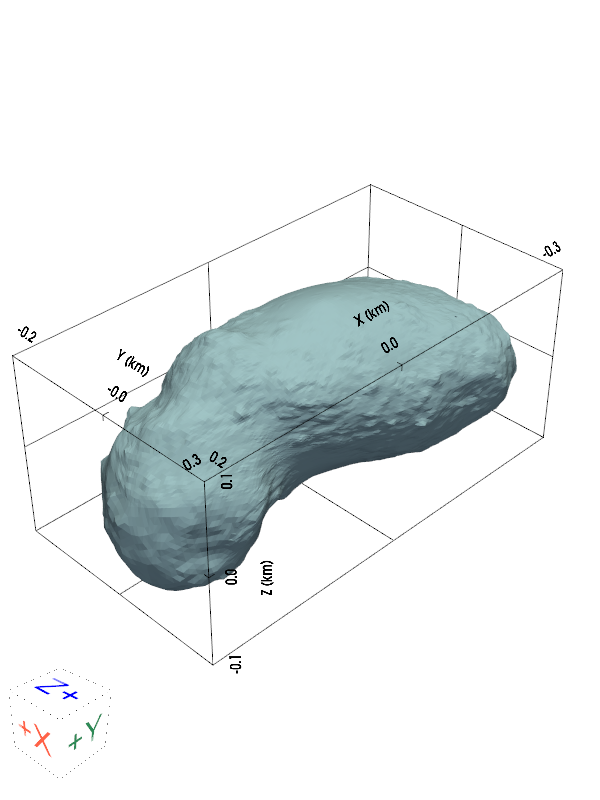

In [3]:
plot_dsk_obj(itokawa)

http://comsim.esac.esa.int/rossim/SHAPE_MODEL_DRAFTS/RO-C-MULTI-5-67P-SHAPE-V3.0/DATA/SPICE_DSK/SPG_DLR/SHAP4S/CG_DLR_SPG_SHAP4S_050K.BDS


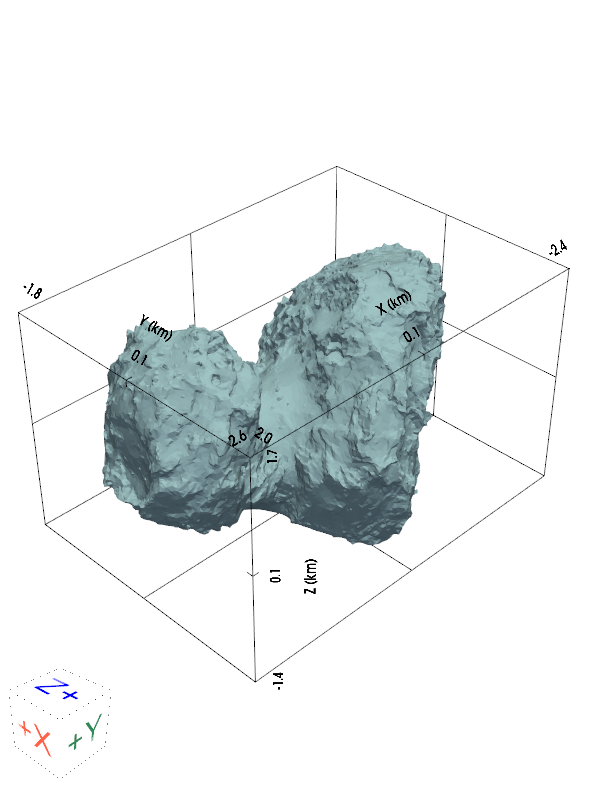

In [4]:
plot_dsk_obj(comet67p)

## References

Either quoted or relevant/useful

Grieger, B. (2019). Quincuncial adaptive closed Kohonen (QuACK) map for the irregularly shaped comet 67P/Churyumov-Gerasimenko. Astronomy & Astrophysics, 630, A1. 

Nagayoshi, T., & Hirata, N. (2022). AiGIS2, a Jupyter Notebook-based Interactive Analysis and Visualization Tool for Asteroid Exploration Data. In AGU Fall Meeting Abstracts (Vol. 2022, pp. P25F-2187).

Vincent, J. B. (2018) ShapeViewer, a Mapping Tool for the Morphological Analysis of Small Bodies and Mission Operations Planning. In 49th Annual Lunar and Planetary Science Conference (No. 2083, p. 1281)

## Links and internet resources

* NAIF/JPL (2023) Digital Shape Kernel Subsystem (DSK)  https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/Tutorials/pdf/individual_docs/37_dsk.pdf
  * DSK required reading - https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/req/dsk.html
* NASA PDS Small Bodies Node - Coordinate systems - https://pdssbn.astro.umd.edu/data_sb/resources/coordinate_systems.shtml
  * [OSIRIS-REx Bennu](https://sbnarchive.psi.edu/pds4/orex/orex.mission/document/Bennu_Coordinate_System_Description.pdf)
  * [Hayabusa2 Ryugu](https://sbnarchive.psi.edu/pds4/hayabusa2/hyb2/document/Ryugu_Coordinate_System_Description.pdf)
  * [Dawn Vesta](https://sbnarchive.psi.edu/pds3/dawn/grand/DWNVGRD_1B/DOCUMENT/VESTA_COORDINATES/VESTA_COORDINATES_131018.PDF)
  * [Dawn Ceres](https://sbnarchive.psi.edu/pds3/dawn/grav/DWNCGRS_2_v3_181005/DOCUMENT/CERES_COORD_SYS_180628.PDF)
  * [67P/C-G Reference Frames and Mapping Scheme](https://pdssbn.astro.umd.edu/holdings/ro-c-multi-5-67p-shape-v1.0/document/cheops_ref_frame_v1.pdf)
  * [Dimorphos Coordinate System Description](https://pdssbn.astro.umd.edu/holdings/pds4-dart:document_draco-v2.0/dimorphos_coordinate_system_description_v1.pdf)
* Spicepy - https://pypi.org/project/spicepy/
  * https://github.com/AndrewAnnex/SpiceyPy
* Comet-Toolbox - https://www.comet-toolbox.com
* Rosetta 3d Tool - http://comsim.esac.esa.int/rossim/3dtool/
